#Supply Chain Analysis

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Supply Chain Analysis/supply_chain_data.csv')

## Visualize the data

In [4]:
# Adjust Pandas display options to show all columns
pd.set_option('display.max_columns', None)  # None for unlimited columns
pd.set_option('display.max_rows', None)  # None for unlimited rows

In [5]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


## Data Overview

In [6]:
# Display basic information about the dataframe (without unique value counts)
info_summary = pd.DataFrame({
    'Column': list(data.columns),
    'Non-Null Count': [data[col].count() for col in data.columns],
    'Null Count': [data[col].isnull().sum() for col in data.columns],
    'Dtype': [data[col].dtype for col in data.columns]
})

print("\nDataFrame Info:")
display(info_summary)

# Display summary statistics of the dataframe
describe_table = data.describe()
print("\nDataFrame Description:")
display(describe_table)

# Separate unique value counts for object-type columns (displaying them separately)
unique_values_count = {col: data[col].nunique() for col in data.select_dtypes(include='object').columns}
unique_values_table = pd.DataFrame([(col, unique_values_count[col]) for col in unique_values_count], columns=['Column', 'Unique Values Count'])
print("\nUnique Values Count for Object-Type Columns:")
display(unique_values_table)


DataFrame Info:


,Column,Non-Null Count,Null Count,Dtype
0,Product type,100,0,object
1,SKU,100,0,object
2,Price,100,0,float64
3,Availability,100,0,int64
4,Number of products sold,100,0,int64
5,Revenue generated,100,0,float64
6,Customer demographics,100,0,object
7,Stock levels,100,0,int64
8,Lead times,100,0,int64
9,Order quantities,100,0,int64



DataFrame Description:


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450



Unique Values Count for Object-Type Columns:


,Column,Unique Values Count
0,Product type,3
1,SKU,100
2,Customer demographics,4
3,Shipping carriers,3
4,Supplier name,5
5,Location,5
6,Inspection results,3
7,Transportation modes,4
8,Routes,3


## Exploratory Data Analysis

In [7]:
# Create lists for numerical and categorical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
obj_cols = data.select_dtypes(include=['object']).columns.tolist()

# Exclude SKU column from categorical columns
obj_cols = [col for col in obj_cols if col != 'SKU']

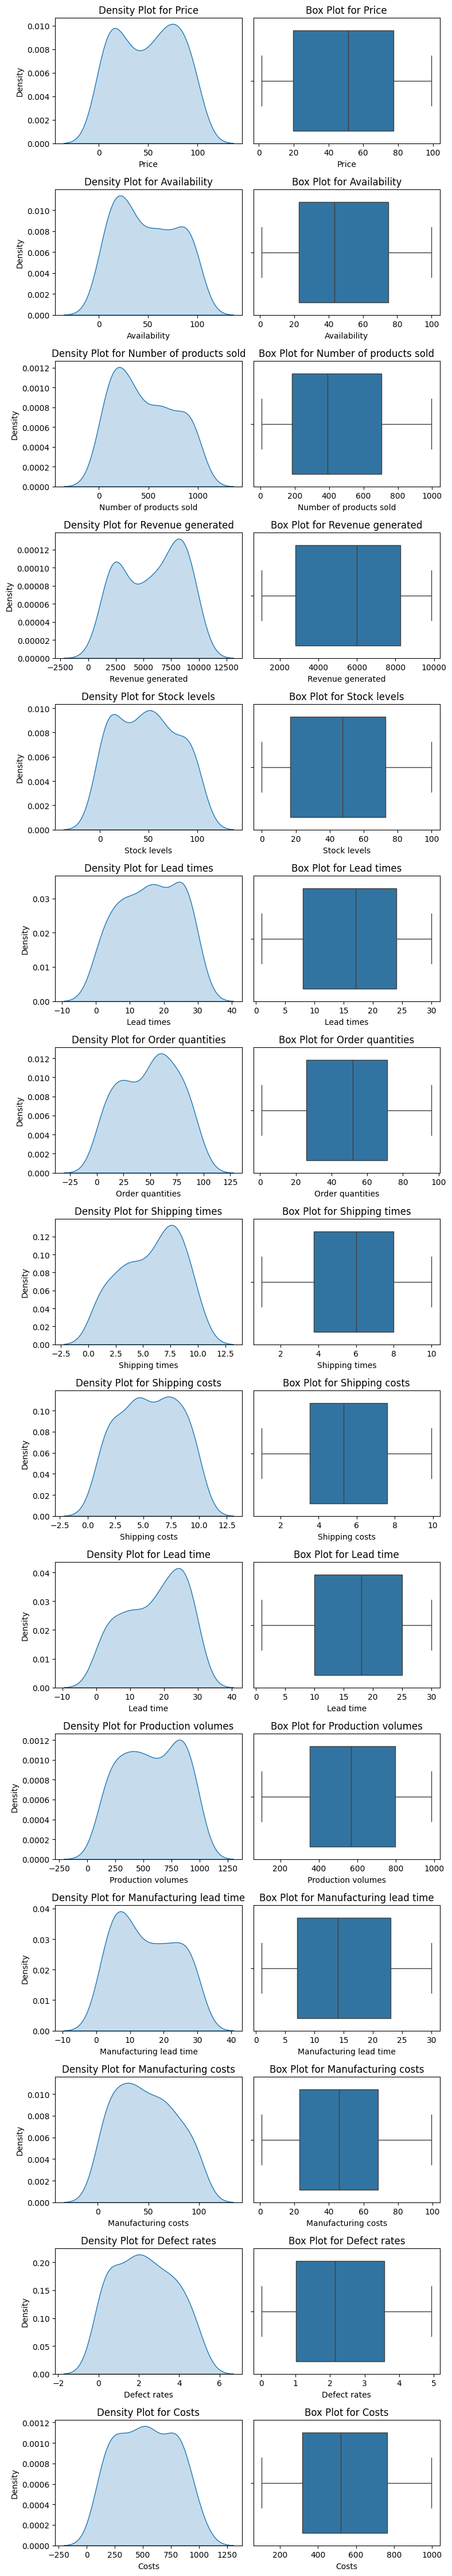

In [8]:
# Univariate Analysis for Numerical Columns
plt.figure(figsize=(8, len(num_cols) * 3))

for i, col in enumerate(num_cols, 1):
    # Density plot for the column
    plt.subplot(len(num_cols), 2, 2*i-1)  # Odd numbered positions for density plots
    sns.kdeplot(data[col], shade=True)
    plt.title(f'Density Plot for {col}')

    # Box plot for the column
    plt.subplot(len(num_cols), 2, 2*i)  # Even numbered positions for box plots
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

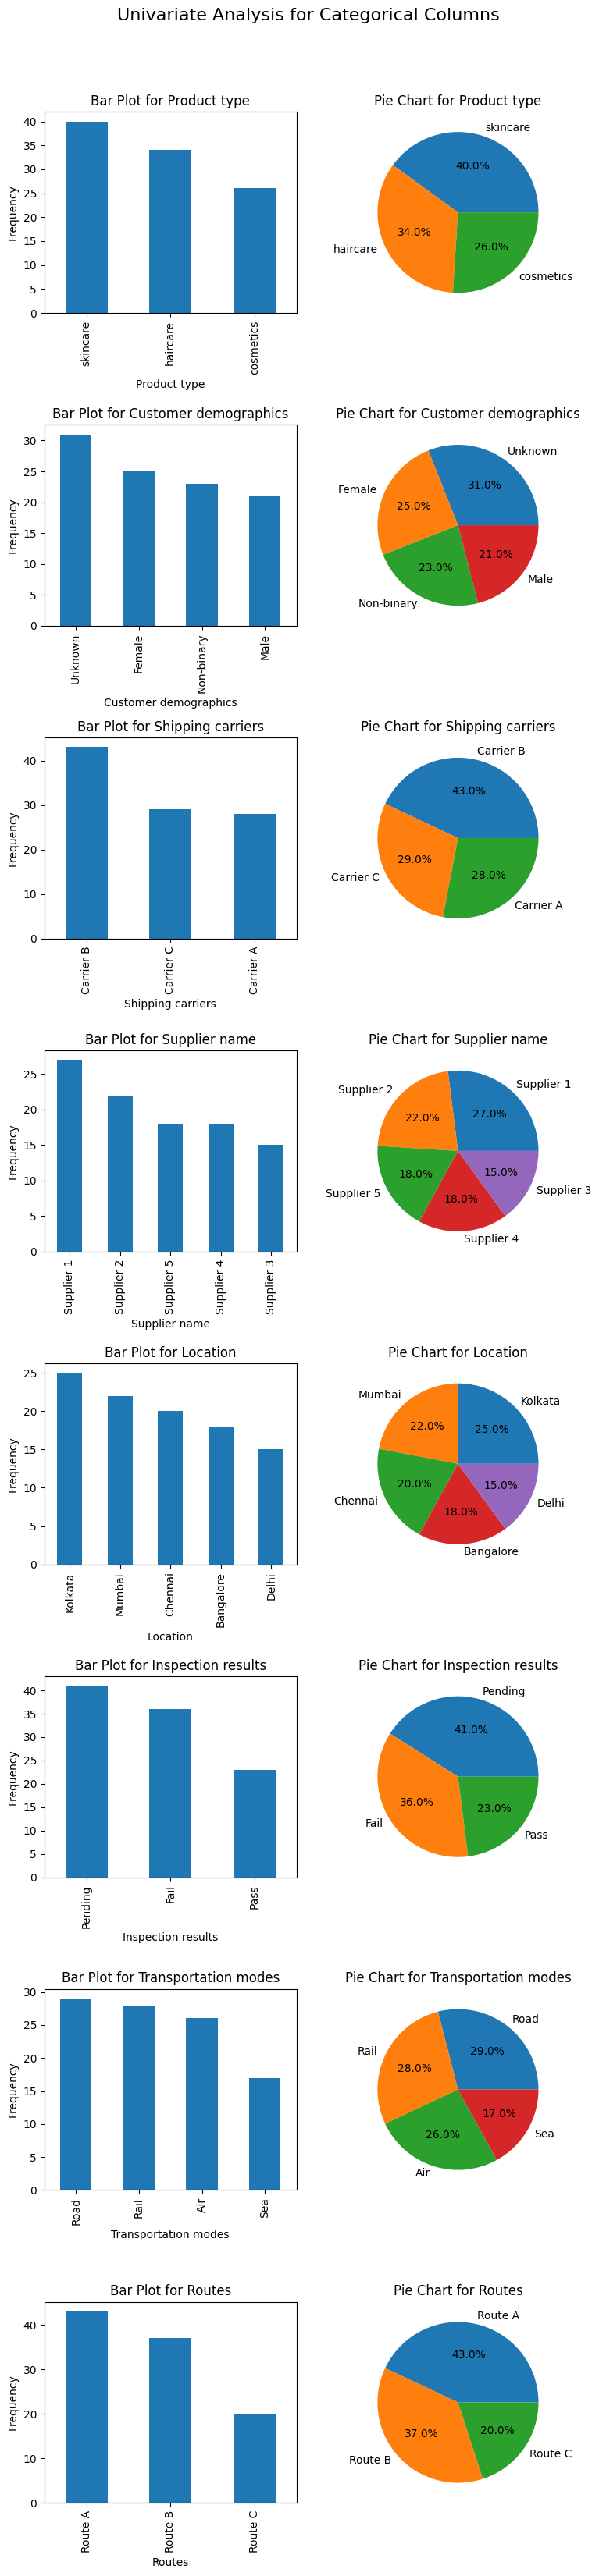

In [9]:
# Univariate Analysis for Categorical Columns (Excluding SKU)
plt.figure(figsize=(8, len(obj_cols) * 4))

for i, col in enumerate(obj_cols, 1):
    # Bar Plot for each categorical column
    plt.subplot(len(obj_cols), 2, 2*i-1)  # Odd numbered positions for bar plots
    data[col].value_counts().plot(kind='bar', ax=plt.gca())
    plt.title(f'Bar Plot for {col}')
    plt.ylabel('Frequency')

    # Pie Chart for each categorical column
    plt.subplot(len(obj_cols), 2, 2*i)  # Even numbered positions for pie charts
    data[col].value_counts().plot(kind='pie', ax=plt.gca(), autopct='%1.1f%%')
    plt.title(f'Pie Chart for {col}')
    plt.ylabel('')  # Hide ylabel for pie chart

plt.tight_layout()
plt.suptitle('Univariate Analysis for Categorical Columns', fontsize=16, y=1.03)
plt.show()

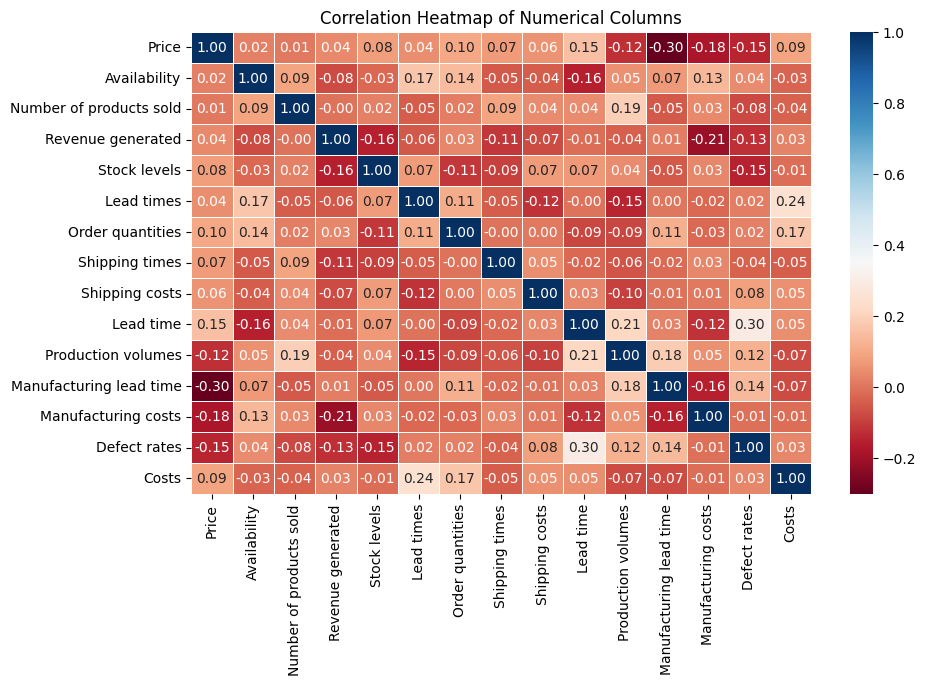

In [10]:
# Bivariate Analysis: Numerical vs. Numerical
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

### Findings from Correlation Analysis  

- The strongest correlation found is **-0.3** between **Price** and **Manufacturing Lead Time**, suggesting that as manufacturing lead time increases, price tends to decrease slightly. However, this correlation is weak.  
- The second highest negative correlation is between **Revenue Generated** and **Manufacturing Costs**, but it is also weak.  
- Overall, no correlations exceed **|0.5|**, meaning there are no strong linear relationships between the numerical variables.  


Contingency Table for Product type and Supplier name:
Supplier name  Supplier 1  Supplier 2  Supplier 3  Supplier 4  Supplier 5
Product type                                                             
cosmetics               7           7           1           4           7
haircare                5          10           5          10           4
skincare               15           5           9           4           7 


Contingency Table for Shipping carriers and Transportation modes:
Transportation modes  Air  Rail  Road  Sea
Shipping carriers                         
Carrier A               5     7    11    5
Carrier B              14    15    11    3
Carrier C               7     6     7    9 


Contingency Table for Customer demographics and Location:
Location               Bangalore  Chennai  Delhi  Kolkata  Mumbai
Customer demographics                                            
Female                         5        4      6        6       4
Male                           5

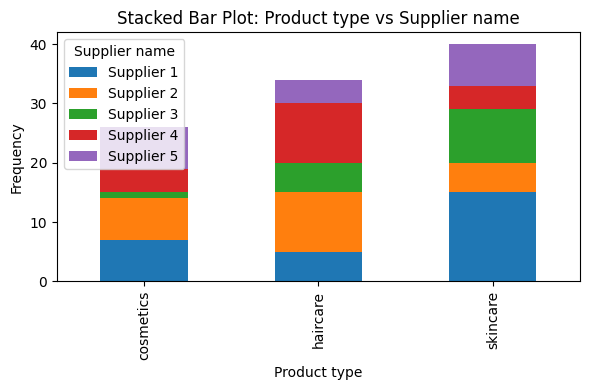

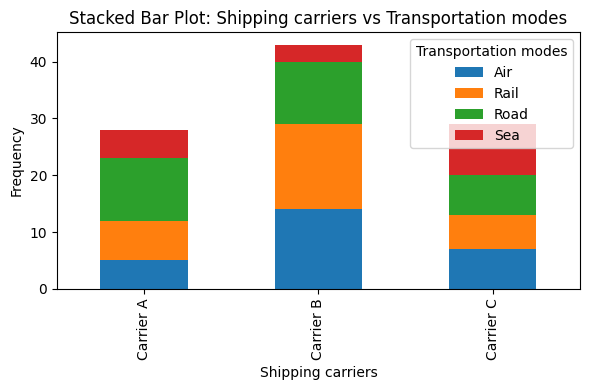

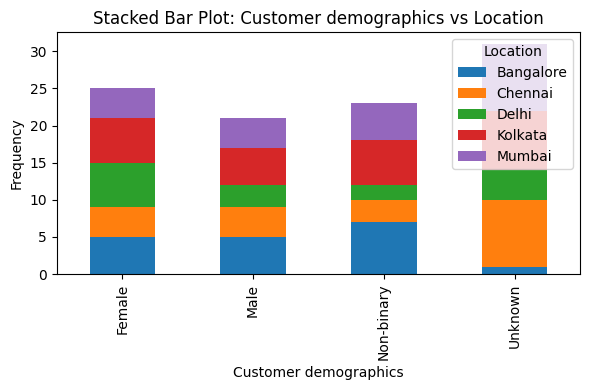

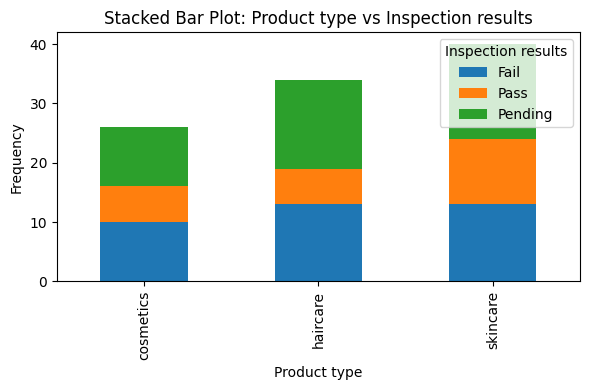

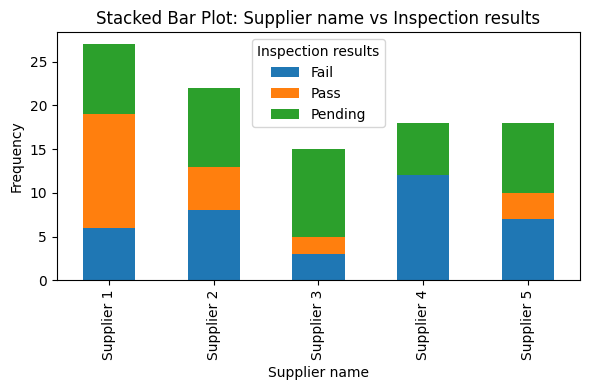

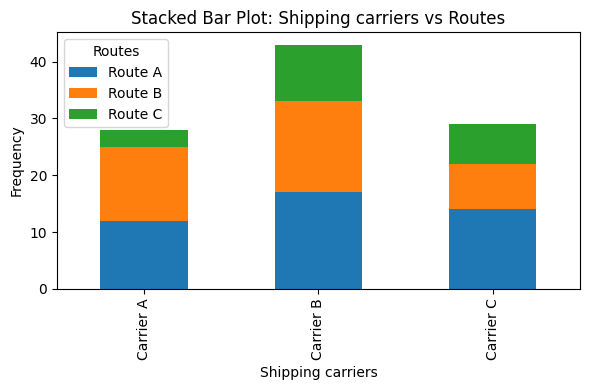

In [11]:
# Bivariate Analysis: Categorical vs Categorical (Cross-tabulation and Stacked Bar Plots)

# Specify pairs of categorical columns for analysis
important_pairs = [
    ('Product type', 'Supplier name'),
    ('Shipping carriers', 'Transportation modes'),
    ('Customer demographics', 'Location'),
    ('Product type', 'Inspection results'),
    ('Supplier name', 'Inspection results'),
    ('Shipping carriers', 'Routes'),
]

# Generate cross-tabulation for each categorical pair
for pair in important_pairs:
    print(f"\nContingency Table for {pair[0]} and {pair[1]}:")
    print(pd.crosstab(data[pair[0]], data[pair[1]]), "\n")

# Generate stacked bar plot for each categorical pair
for pair in important_pairs:
    ax = data.groupby(list(pair)).size().unstack().plot(kind='bar', stacked=True, figsize=(6, 4))
    plt.title(f'Stacked Bar Plot: {pair[0]} vs {pair[1]}')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Actionable Insights

- **Product Type and Supplier Name**:
  - Diversify the supplier base across all product types to mitigate risks and ensure supply chain flexibility. For example, cosmetics products are heavily reliant on Supplier 1 and Supplier 2, with Supplier 3 having minimal representation. This imbalance can increase vulnerability to supply chain disruptions.

- **Shipping Carriers and Transportation Modes**:
  - Align transportation modes with each carrier’s strengths. Carrier B should be leveraged for Rail and Road shipments, given its dominance in these modes, while Carrier A is ideal for smaller, urgent Air shipments. Carrier C is best suited for Sea shipments, reflecting its higher involvement in this mode.

- **Customer Demographics and Location**:
  - Tailor marketing strategies to focus on specific customer demographics in key locations. For example, engage more with females in Delhi and Kolkata, and target non-binary customers across all regions. Additionally, improve the accuracy of demographic data, particularly for Chennai and Mumbai, to reduce the "Unknown" category and enable better-targeted campaigns.

- **Product Type and Inspection Results**:
  - Focus on improving inspection processes for products like cosmetics and haircare, which have a relatively high number of "Fail" and "Pending" inspections. This can help improve product quality and reduce potential returns or customer dissatisfaction.

- **Supplier Name and Inspection Results**:
  - Address the high failure rate associated with Supplier 4, particularly in products like haircare, where 12 out of 18 units failed inspection. This could indicate issues with production quality, and further quality control or switching suppliers may be necessary to ensure consistent product quality.

- **Shipping Carriers and Routes**:
  - Carrier A dominates in Routes A and B, but its limited use of Route C indicates potential inefficiency or missed opportunities. Consider exploring improvements in shipping flexibility or capacity, especially for Route C, which is currently

In [12]:
# List significant numeric-categorical column pairs based on the Kruskal-Wallis test.
def statistical_test_bivariate_num_obj(data, num_cols, obj_cols):
    # Initialize an empty list to store significant pairs
    significant_pairs = []

    # Loop through numeric columns and categorical columns
    for num_col in num_cols:
        for obj_col in obj_cols:
            # Group data by the categorical column and perform Kruskal-Wallis test
            groups = [data[num_col][data[obj_col] == category] for category in data[obj_col].unique()]
            stat, p_value = stats.kruskal(*groups)

            # Check if the p-value is significant (less than 0.05)
            if p_value < 0.05:
                # Save the significant pair (num_col, obj_col) to the list
                significant_pairs.append((num_col, obj_col))

    # Return the list of significant pairs
    return significant_pairs

# Call the function to perform the statistical test and get the list of significant pairs
significant_combos = statistical_test_bivariate_num_obj(data, num_cols, obj_cols)

# Print the significant pairs
print("Significant combinations:")
print(significant_combos)

Significant combinations:
[('Price', 'Location'), ('Number of products sold', 'Shipping carriers'), ('Number of products sold', 'Location'), ('Shipping times', 'Transportation modes'), ('Manufacturing lead time', 'Location'), ('Manufacturing lead time', 'Inspection results'), ('Defect rates', 'Shipping carriers')]


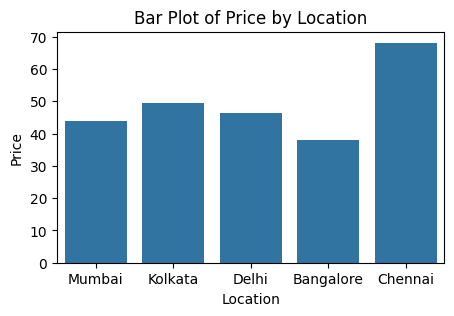

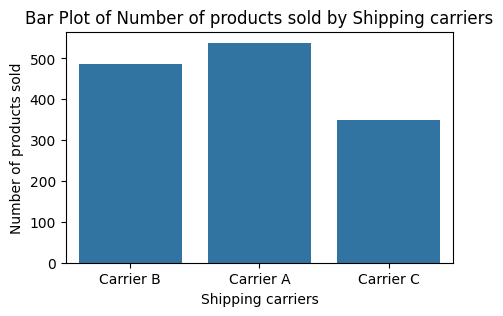

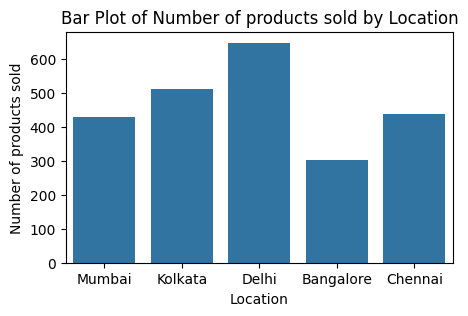

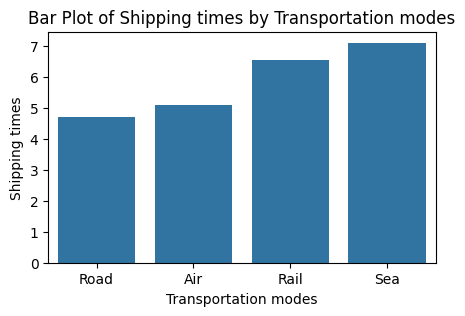

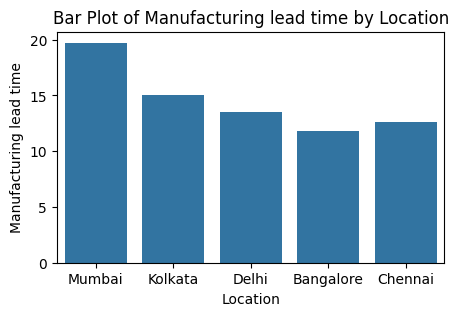

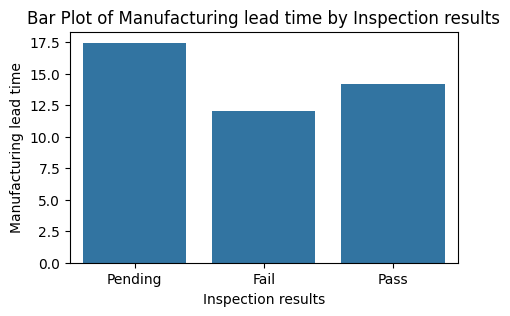

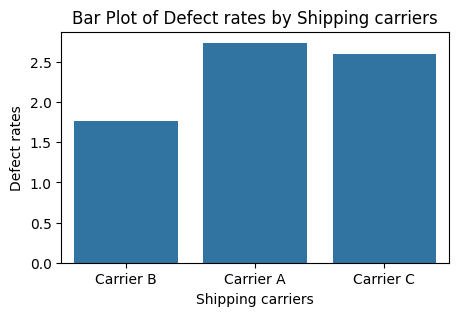

Mean of Price by Location:
    Location      Price
0  Bangalore  38.033169
1    Chennai  68.147401
2      Delhi  46.273849
3    Kolkata  49.452773
4     Mumbai  44.012456


Mean of Number of products sold by Shipping carriers:
  Shipping carriers  Number of products sold
0         Carrier A               538.607143
1         Carrier B               485.790698
2         Carrier C               349.275862


Mean of Number of products sold by Location:
    Location  Number of products sold
0  Bangalore               301.111111
1    Chennai               438.400000
2      Delhi               647.666667
3    Kolkata               510.800000
4     Mumbai               428.454545


Mean of Shipping times by Transportation modes:
  Transportation modes  Shipping times
0                  Air        5.115385
1                 Rail        6.571429
2                 Road        4.724138
3                  Sea        7.117647


Mean of Manufacturing lead time by Location:
    Location  Manufacturin

In [13]:
# Bivariate Analysis: Numerical vs Categorical
for num_col, obj_col in significant_combos:
    # Bar Plot
    plt.figure(figsize=(5, 3))
    sns.barplot(x=obj_col, y=num_col, data=data, ci=None)
    plt.title(f'Bar Plot of {num_col} by {obj_col}')
    plt.show()

# For each significant pair, compute and display the mean of the numeric variable grouped by the categorical variable
for num_col, obj_col in significant_combos:
    agg_table = data.groupby(obj_col)[num_col].mean().reset_index()
    print(f"Mean of {num_col} by {obj_col}:")
    print(agg_table)
    print("\n")

### Actionable Insights

- **Price and Location:**
   - Implement location-specific pricing strategies to account for regional market differences. For example, Chennai has a significantly higher price point than other locations, which might reflect local demand or premium product positioning. Adjust pricing to match local purchasing power and demand.

- **Number of Products Sold and Shipping Carriers:**
   - Strengthen partnerships with "Carrier A" to improve logistics and sales efficiency. Carrier A is associated with higher sales, suggesting that it may be more efficient or reliable in delivering products. Focusing on Carrier A for bulk shipments could improve overall sales performance.

- **Number of Products Sold and Location:**
   - Invest in targeted sales efforts in Delhi, where the highest number of products are sold. Delhi's high sales could reflect a strong customer base, so expanding product availability or offering localized promotions could further boost sales in this region.

- **Shipping Times and Transportation Modes:**
   - Prioritize faster shipping methods, particularly air and road, for urgent deliveries. Air and road modes have the shortest shipping times, making them ideal for time-sensitive orders. Enhancing air and road transportation capabilities can improve delivery times and customer satisfaction.

- **Manufacturing Lead Time and Location:**
   - Investigate and optimize the manufacturing process in Mumbai to reduce lead time. Mumbai has the longest lead time, which could be due to inefficiencies in production. Identifying and addressing the bottlenecks can help reduce production delays and enhance operational efficiency.

- **Manufacturing Lead Time and Inspection Results:**
   - Improve the inspection process for products that pass to reduce overall manufacturing lead time. Products with "Pass" inspection results have the shortest lead times, indicating an opportunity to streamline the inspection process for better efficiency and quicker turnaround.

- **Defect Rates and Shipping Carriers:**
   - Work closely with "Carrier A" to reduce defect rates in shipping. Carrier A shows higher defect rates, which could impact customer satisfaction and product returns. Collaborating with them to improve packaging or handling procedures could reduce defects and improve overall product quality.